In [1]:
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
from keras.models import Model,Sequential
#UpSampling2D é contrário do MaxPooling
from keras.layers import Input,Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape
from keras.utils import np_utils

In [ ]:
(previsores_treinamento,classe_treinamento), (previsores_teste,classe_teste) = mnist.load_data()

In [3]:
previsores_treinamento = previsores_treinamento.reshape((len(previsores_treinamento), 28,28,1)) #Registro,linha,coluna,numero_canais_cor
previsores_teste = previsores_teste.reshape((len(previsores_teste), 28,28,1)) #Registro,linha,coluna,numero_canais_cor

In [4]:
previsores_treinamento = previsores_treinamento.astype('float32')/255
previsores_teste = previsores_teste.astype('float32')/255

In [5]:
previsores_treinamento.shape

(60000, 28, 28, 1)

In [6]:
previsores_teste.shape

(10000, 28, 28, 1)

In [ ]:
autoencoder = Sequential()
autoencoder.add(Conv2D(filters=16, kernel_size = (3,3), activation = 'relu', input_shape = (28,28,1)))
autoencoder.add(MaxPooling2D(pool_size=(2,2)))
autoencoder.add(Conv2D(filters=8, kernel_size = (3,3), activation = 'relu',padding='same'))
autoencoder.add(MaxPooling2D(pool_size=(2,2), padding='same'))
autoencoder.add(Conv2D(filters=8, kernel_size = (3,3), activation = 'relu',padding='same', strides = (2,2)))
autoencoder.add(Flatten())
autoencoder.add(Reshape((4,4,8)))


autoencoder.add(Conv2D(filters=8, kernel_size = (3,3), activation = 'relu',padding='same'))
autoencoder.add(UpSampling2D(size=(2,2)))
autoencoder.add(Conv2D(filters=8, kernel_size = (3,3), activation= 'relu', padding= 'same'))
autoencoder.add(UpSampling2D(size = (2,2)))
autoencoder.add(Conv2D(filters=16, kernel_size = (3,3), activation= 'relu'))
autoencoder.add(UpSampling2D(size=(2,2)))
autoencoder.add(Conv2D(filters=1, kernel_size = (3,3), activation= 'sigmoid', padding= 'same'))

autoencoder.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics= ['accuracy'])
autoencoder.fit(previsores_treinamento,previsores_treinamento, epochs = 50, batch_size=256, validation_data=(previsores_teste,previsores_teste))

In [ ]:
autoencoder.summary()

In [27]:
encoder = Model(inputs = autoencoder.input, outputs = autoencoder.get_layer('flatten_2').output)

In [ ]:
encoder.summary()

In [28]:
imagens_codificadas = encoder.predict(previsores_teste)
imagens_decodificadas = autoencoder.predict(previsores_teste)

In [29]:
imagens_codificadas.shape

(10000, 128)

In [31]:
imagens_decodificadas.shape

(10000, 28, 28, 1)

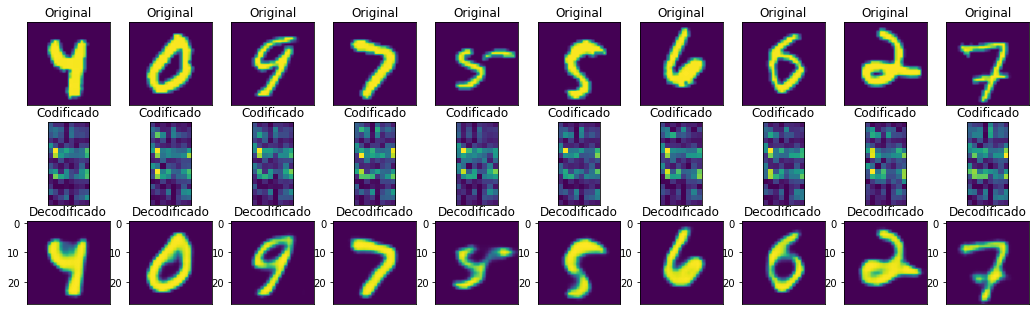

In [35]:
numeroImagens = 10
imagensTeste = np.random.randint(previsores_teste.shape[0], size = numeroImagens) #Seleciona 10 imagens no intervalo de previsores_teste.shape[0]
plt.figure(figsize=(18,18))
for i, indiceImagem in enumerate(imagensTeste):
    eixo = plt.subplot(10,10,i+1) #linhas,colunas,indice para imagem
    plt.title("Original")
    plt.imshow(previsores_teste[indiceImagem].reshape(28,28))
    plt.xticks(()) #Remove eixo x
    plt.yticks(()) #Remove eixo y

    eixo = plt.subplot(10,10,i+1+numeroImagens) #linhas,colunas,indice para imagem
    plt.title("Codificado")
    plt.imshow(imagens_codificadas[indiceImagem].reshape(16,8))
    plt.xticks(()) #Remove eixo x
    plt.yticks(()) #Remove eixo y

    eixo = plt.subplot(10,10,i+1+numeroImagens*2) #linhas,colunas,indice para imagem
    plt.title("Decodificado")
    plt.imshow(imagens_decodificadas[indiceImagem].reshape(28,28))
    plt.xticks(()) #Remove eixo x